<a href="https://colab.research.google.com/github/inefable12/cgmartini/blob/main/MDS_CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{Dinámica Molecular con Coarse Grained}$$

$$\large\textbf{Sesión N°5}$$
$$\textit{(C8987) Química Computacional y Simulaciones}$$

_Profesores:_
- Jesus Alvarado-Huayhuaz
- Wilfredo Evangelista

En este colab, vamos a realizar la dinámica molecular CG del DPPC en agua (solvente explícito, TIP3P) a diferentes temperaturas. Todo el procedimiento puede realizarse desde este cuaderno de código (Colab) y no es necesario instalar algún programa a tu computadora o descargar algún archivo extra. Este material está dirigido para iniciantes en Gromacs que no dispongan de una PC con sistema operativo Linux.

# 1. Requerimientos

In [ ]:
%%capture
!apt install gromacs
#!gmx pdb2gmx --version
!pip install py3dmol
!pip install insane

In [ ]:
#!wget https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/martini.itp https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/em.mdp https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/DPPC.itp

# 2. Creación de la membrana lipídica

In [ ]:
!insane -h

/usr/local/bin/insane

     
    Input/output related options
    
     -f           Input GRO or PDB file 1: Solute (e.g. Protein) ( [] )
     -o           Output GRO file: Membrane with Protein ( [] )
     -p           Optional rudimentary topology file ( None )
     
    Periodic boundary conditions
    If -d is given, set up PBC according to -pbc such that no periodic
    images are closer than the value given. When macromolecules are 
    included -d indicates the distance between any of them, within a 
    unit cell or across PBC. When having only absolute numbers of lipids, 
    the size of the cell will be calculate from the area per lipid.
    
     -pbc         PBC type: hexagonal, rectangular, square, cubic, optimal or keep ( hexagonal )
     -d           Distance between periodic images (nm) ( 0 )
     -dz          Z distance between periodic images (nm) ( None )
     -x           X dimension or first lattice vector of system (nm) ( None )
     -y           Y dimension or f

In [ ]:
!insane -l DPPC -x 6 -y 6 -z 8 -sol W -o DPPC.gro -p topol.top

; X: 6.000 (8 bins) Y: 6.000 (8 bins) in upper leaflet
; X: 6.000 (8 bins) Y: 6.000 (8 bins) in lower leaflet
; 64 lipids in upper leaflet, 64 lipids in lower leaflet
; NDX Solute 1 0
; Charge of protein: 0.000000
; NDX Membrane 1 1536
; Charge of membrane: 0.000000
; Total charge: 0.000000
; NDX Solvent 1537 2616
; NDX System 1 2616
; "I mean, the good stuff is just INSANE" --Julia Ormond


In [ ]:
#@title Visualización de la bicapa creada

import py3Dmol

view = py3Dmol.view(width=400, height=300)
view.addModel(open('DPPC.gro', 'r').read(),'gro')
view.setBackgroundColor('black')
#view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

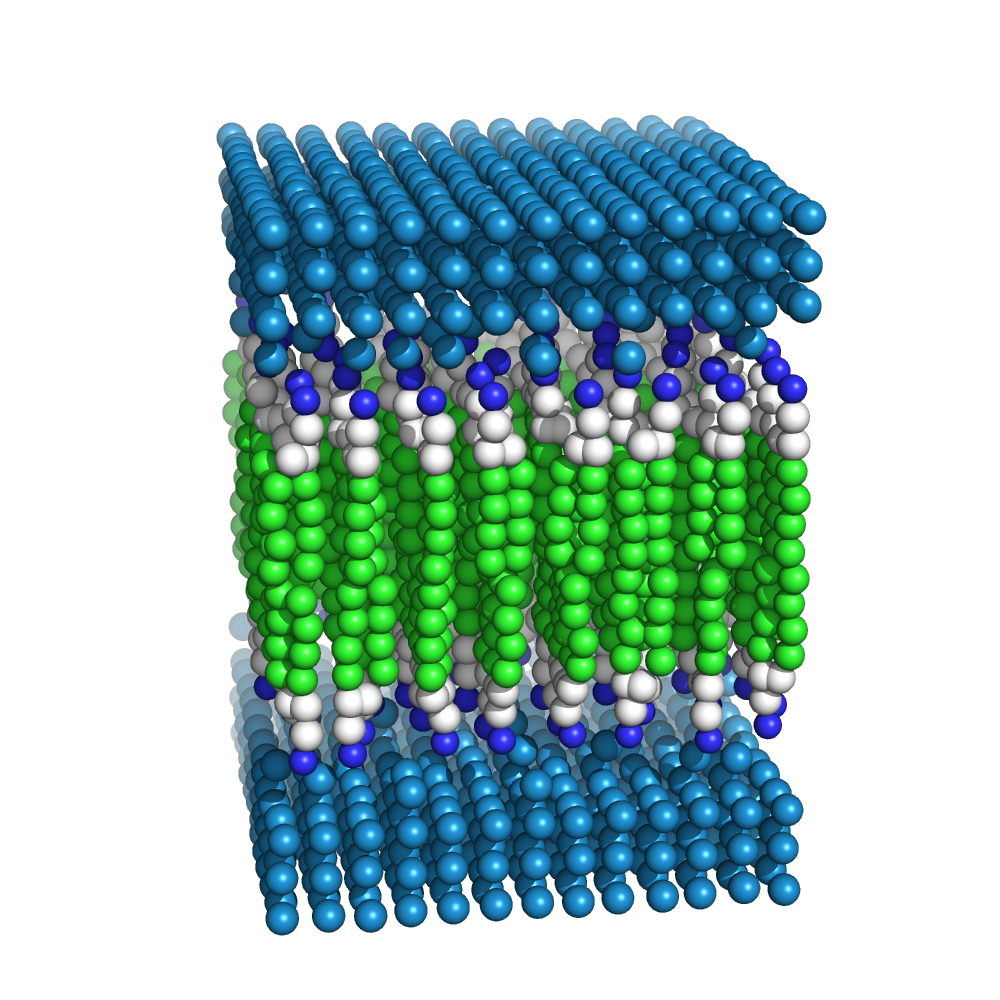

In [ ]:
!cat topol.top

#include "martini.itp"

[ system ]
; name
INSANE! Membrane UpperLeaflet>DPPC=1 LowerLeaflet>DPPC=1


[ molecules ]
; name  number
DPPC            64
DPPC            64
W             1080


# 3. Minimización de energía

In [ ]:
# Editar el topol.top con:
#include "DPPC.itp"
!gmx grompp -f em.mdp -c DPPC.gro -p topol.top

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Llamamos al archivo generado tpr y ejecutamos. Esto se detendrá hasta la convergencia.

In [ ]:
!gmx mdrun -s topol.tpr -v

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

# 4. Conectividad

In [ ]:
!gmx trjconv -f confout.gro -o CONNECT.pdb -conect -pbc whole
# elegir la opción 0

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Ahora se ha generado explicitamente la conectividad:

In [ ]:
!cat CONNECT.pdb

REMARK    GENERATED BY TRJCONV
TITLE     INSANE! Membrane UpperLeaflet>DPPC=1 LowerLeaflet>DPPC=1
REMARK    THIS IS A SIMULATION BOX
CRYST1   60.000   60.000   80.000  90.00  90.00  90.00 P 1           1
MODEL        1
ATOM      1  NC3 DPPC    1      56.170  25.430  61.430  1.00  0.00            
ATOM      2  PO4 DPPC    1      52.390  24.720  60.330  1.00  0.00            
ATOM      3  GL1 DPPC    1      53.020  26.930  57.040  1.00  0.00            
ATOM      4  GL2 DPPC    1      55.200  28.840  57.620  1.00  0.00            
ATOM      5  C1A DPPC    1      53.670  27.440  52.450  1.00  0.00            
ATOM      6  C2A DPPC    1      55.240  28.490  48.180  1.00  0.00            
ATOM      7  C3A DPPC    1      54.530  27.280  43.760  1.00  0.00            
ATOM      8  C4A DPPC    1      51.810  24.490  41.140  1.00  0.00            
ATOM      9  C1B DPPC    1      58.540  29.050  54.340  1.00  0.00            
ATOM     10  C2B DPPC    1      60.310  29.460  50.010  1.00  0.00    

In [ ]:
# Editar el pdb
!grep -v ENDMDL CONNECT.pdb > CONNECT_edit1.pdb
!grep -v TER CONNECT_edit1.pdb > CONNECT_edit2.pdb

verificamos la eliminación de "TER" y "ENDMDL"

In [ ]:
!cat CONNECT_edit2.pdb

REMARK    GENERATED BY TRJCONV
TITLE     INSANE! Membrane UpperLeaflet>DPPC=1 LowerLeaflet>DPPC=1
REMARK    THIS IS A SIMULATION BOX
CRYST1   60.000   60.000   80.000  90.00  90.00  90.00 P 1           1
MODEL        1
ATOM      1  NC3 DPPC    1      56.170  25.430  61.430  1.00  0.00            
ATOM      2  PO4 DPPC    1      52.390  24.720  60.330  1.00  0.00            
ATOM      3  GL1 DPPC    1      53.020  26.930  57.040  1.00  0.00            
ATOM      4  GL2 DPPC    1      55.200  28.840  57.620  1.00  0.00            
ATOM      5  C1A DPPC    1      53.670  27.440  52.450  1.00  0.00            
ATOM      6  C2A DPPC    1      55.240  28.490  48.180  1.00  0.00            
ATOM      7  C3A DPPC    1      54.530  27.280  43.760  1.00  0.00            
ATOM      8  C4A DPPC    1      51.810  24.490  41.140  1.00  0.00            
ATOM      9  C1B DPPC    1      58.540  29.050  54.340  1.00  0.00            
ATOM     10  C2B DPPC    1      60.310  29.460  50.010  1.00  0.00    

In [ ]:
#@title Visualización

import py3Dmol

view = py3Dmol.view(width=400, height=300)
view.addModel(open('CONNECT_edit2.pdb', 'r').read(),'pdb')
view.setBackgroundColor('black')
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

![dppc_pdb](https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/dppc_pdb.png)

# 4. Pruebas a diferentes temperaturas


In [ ]:
#Crearemos carpetas para cada temperatura (K) a simular
!mkdir 295 310 340 400

## 4.1 Temperatura = 295

In [ ]:
!wget https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/md.mdp
# observar:
# tc-grps = DPPC W
# ref_t = 295 295

--2024-05-23 09:54:35--  https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/md.mdp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7366 (7.2K) [text/plain]
Saving to: ‘md.mdp’

md.mdp              100%[===================>]   7.19K  --.-KB/s    in 0s      

2024-05-23 09:54:35 (61.9 MB/s) - ‘md.mdp’ saved [7366/7366]



In [ ]:
!cat md.mdp

;
; STANDARD MD INPUT OPTIONS FOR MARTINI 2.x
; Updated 15 Jul 2015 by DdJ
;
; for use with GROMACS 5
; For a thorough comparison of different mdp options in combination with the Martini force field, see:
; D.H. de Jong et al., Martini straight: boosting performance using a shorter cutoff and GPUs, submitted.

title                    = Martini

; TIMESTEP IN MARTINI 
; Most simulations are numerically stable with dt=40 fs, 
; however better energy conservation is achieved using a 
; 20-30 fs timestep. 
; Time steps smaller than 20 fs are not required unless specifically stated in the itp file.

integrator               = md
dt                       = 0.03
nsteps                   = -1
nstcomm                  = 100
comm-grps		         =
;define                   = -DPOSRES 

nstxout                  = 1000000
nstvout                  = 1000000
nstfout                  = 1000000
nstlog                   = 1000000
nstenergy                = 100000
nstxout-compressed       = 100000
compr

In [ ]:
!gmx grompp -f md.mdp -c confout.gro -p topol.top -o 295/topol.tpr

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [ ]:
!ls 295

topol.tpr


## 4.2 Temperatura = 310

In [ ]:
# Editar el archivo md.mdp con la temperatura 310
# ref_t = 310 310

## 4.3 Temperatura = 340

In [ ]:
# Editar el archivo md.mdp con la temperatura 310
# ref_t = 340 340

## 4.4 Temperatura = 400

In [ ]:
# Editar el archivo md.mdp con la temperatura 310
# ref_t = 400 400

# 5. Corremos la simulación

Para cada una de las temperaturas

In [ ]:
%cd 295
!gmx mdrun -v

/content/295
              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff

# 6. Visualización

In [ ]:
!gmx trjconv -f traj_comp.xtc -o whole.xtc -pbc whole

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

Abrir en pymol el archivo CONNECT_edit2.pdb y a continuación whole.xtc

# 7. Análisis

In [ ]:
!gmx energy -f ener.edr

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

seleccionar 11 y 12, de Box-X y Box-Y

Visualiza con XMGRACE en tu computadora

In [ ]:
#xmgrace energy.xvg

![energy](https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/energy_dppc.png)

In [ ]:
# calculo del área por lípido
# area/64

In [ ]:
# cálculo de la electrodensidad
# se emiten una fuente de neutrones a la membrana y da un perfil de penetración
# membrana que están en gel nos da un perfil diferente
!gmx density -f traj_comp.xtc -sl 100 -d z -o DPPC.xvg

             :-) GROMACS - gmx density, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

sl son los slides de corte, mientras más es mejor

sl = 100, quiere decir que la va a cortar en 100 partes

d = z

In [ ]:
# repetimos pero ahora para el agua
!gmx density -f traj_comp.xtc -sl 100 -d z -o W.xvg

             :-) GROMACS - gmx density, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

![dens](https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/densidad_dppc.png)

# Coeficiente de difusión lateral

In [ ]:
!gmx msd -f traj_comp.xtc -lateral z -rmcomm

               :-) GROMACS - gmx msd, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Te

Se seleccionó 2 y 2 (DPPC en los dos casos)

Se obtuvo para el DPPC 0.0171 (+/- 0.0000) 1e-5 cm^2/s

Visualizar el archivo msd.xvg con XMGRACE

![MSD](https://raw.githubusercontent.com/inefable12/cgmartini/main/DPPC_CG/MSD_dppc.png)

Podemos decir que en 3000 ps (3 ns) las moléculas de DPPC se han movido en promedio 0.3 nm^2 con respecto a la posición inicial. Y en 6 ns?

No se indica la dirección, unicamente el promedio del desplazamiento

Si el coeficiente de difusión (pendiente en la figura mostrada) es mayor, la membrana se desplaza más, como en el caso de los líquidos, o si es menor hay un menor desplazamiento como en el caso de los geles.

Compara los coeficientes de difusión para las diferentes temperaturas.